In [64]:
%%HTML
<div align='right'>
<script>
    code_show=true;
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    }
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
    </div>

# Campus as a Lab Sites

If you want information on the sites or a quick overview of the most recent data, then you should check out the website. 

In [66]:
IFrame('http://hydrometeorology.princeton.edu', height=600, width=1000)

# NetCDF files

NetCDF files are used for storing self-describing data in a concise and consistent way. They bridge the gap between acquired data - generally in data tables on local machines - and researchers trying to study the data. These data are made available on servers (THREDDS) which can be queried directly or accessed via web tools (ERDDAP) and computing languages (such as Python, R and Matlab). 

<img src="screenshots/data_collection_overview.jpg" width=100%/>

## THREDDS

[THREDDS](http://hydromet-thredds.princeton.edu:9000/thredds/catalog.html) is an server for hosting NetCDF files and is where you will find the unique URL for the dataset of interest.

In [67]:
from IPython.display import IFrame
IFrame('http://hydromet-thredds.princeton.edu:9000/thredds/catalog.html',width=1000, height=600)

## ERDDAP

[ERDDAP](http://hydromet-thredds.princeton.edu:8000/erddap/info/index.html?page=1&itemsPerPage=1000) is a web-based tool that can be used to create simple graphics and select subsets of data for download. It is place to start your data analysis.

In [68]:
IFrame('http://hydromet-thredds.princeton.edu:8000/erddap/info/index.html?page=1&itemsPerPage=1000', width=1000, height=600)

# Python

Python is an open-source computing language with a broad base of support. It is package-based and can be used for development as well as data analysis. Here is an example of the types of products that can be generated:


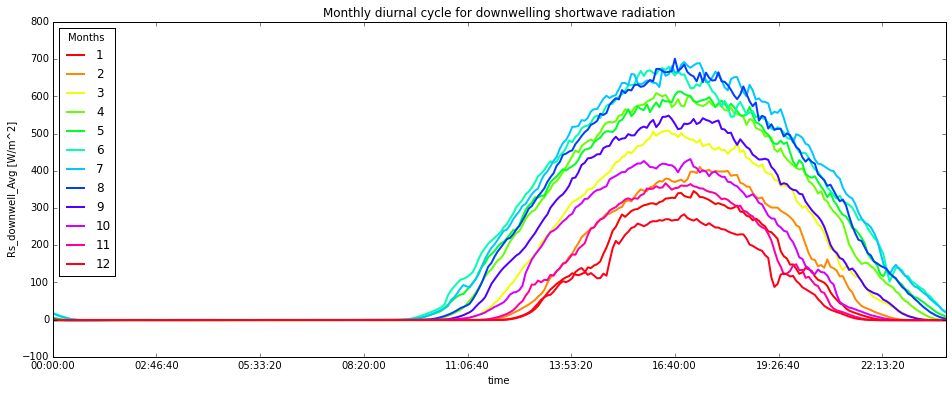

In [69]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc'
ds = xr.open_dataset(data_url)
var = 'Rs_downwell_Avg'
df = ds[var].to_dataframe()

pv = pd.pivot_table(df, index=df.index.time, columns=df.index.month, values= var, aggfunc='mean')
pv.plot(figsize=(16,6), color=cm.hsv(np.linspace(0, 1, 12)), linewidth=2,
        title='Monthly diurnal cycle for downwelling shortwave radiation')
plt.legend(title='Months', loc='upper left')
plt.ylabel('{var} [{units}]'.format(var=var, units=ds[var].units))
plt.show()

# Python

One of the coolest things about Python (and R and Matlab) is its reproducibility. Once you have a plot that you like, you can easily change the variable that you are looking at, the timespan, or the site. 

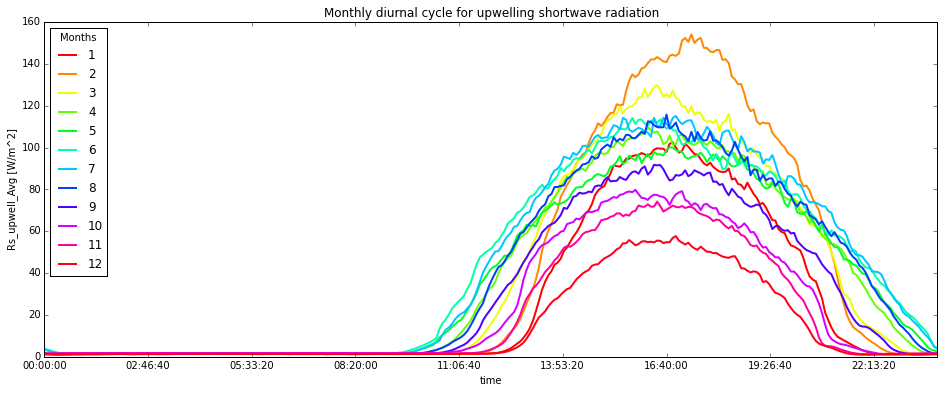

In [70]:
var = 'Rs_upwell_Avg'
df = ds[var].to_dataframe()

pv = pd.pivot_table(df, index=df.index.time, columns=df.index.month, values= var, aggfunc='mean')
pv.plot(figsize=(16,6), color=cm.hsv(np.linspace(0, 1, 12)), linewidth=2,
        title='Monthly diurnal cycle for upwelling shortwave radiation')
plt.legend(title='Months', loc='upper left')
plt.ylabel('{var} [{units}]'.format(var=var, units=ds[var].units))
plt.show()